In [184]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"

Mounted at /content/gdrive


In [0]:
!cp gdrive/"My Drive"/dataset-rocky-all-feats.csv ./

# Test with sklearn

In [0]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [0]:
df = pd.read_csv('dataset-rocky-all-feats.csv')

In [0]:
df = df.drop('P. Habitable', axis=1)

In [0]:
nb = GaussianNB()

In [0]:
y = df['hab_lbl']

In [0]:
x = df.drop('hab_lbl', axis=1)

In [196]:
x.head()

,P. Zone Class,P. Mass Class,P. Composition Class,P. Atmosphere Class,P. Min Mass (EU),P. Mass (EU),P. Radius (EU),P. Density (EU),P. Gravity (EU),P. Esc Vel (EU),...,S. Appar Mag,S. Mag from Planet,S. Size from Planet (deg),S. Hab Zone Min (AU),S. Hab Zone Max (AU),P. HZD,P. HZC,P. HZA,P. HZI,P. ESI
0,2,2,2,2,18.217914,8.10,1.99,1.03,2.05,2.02,...,6.0,-35.2,33.0178,0.591,1.419,-2.39,0.06,-0.81,0.28,0.26
1,2,2,3,2,5.090000,5.09,1.66,1.10,1.84,1.75,...,4.7,-32.9,10.0643,0.656,1.556,-2.35,-0.15,-0.69,0.29,0.27
2,2,4,3,3,1.140000,1.14,1.09,0.89,0.97,1.03,...,1.3,-33.0,11.5197,0.545,1.306,-2.33,-0.17,-1.12,0.28,0.30
3,2,2,3,2,11.770000,16.31,2.23,1.47,3.28,2.71,...,11.0,-29.7,2.0522,0.694,1.636,-1.96,-0.13,0.61,0.33,0.33
4,2,2,3,2,8.580000,8.58,1.91,1.23,2.35,2.12,...,6.7,-33.4,20.5046,0.735,1.832,-2.26,-0.14,-0.54,0.30,0.26


In [198]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [199]:
nb.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [200]:
nb.score(x_test, y_test)

0.9863813229571985

In [203]:
preds = nb.predict(x_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       501
           1       0.86      1.00      0.92         6
           2       0.50      0.86      0.63         7

   micro avg       0.99      0.99      0.99       514
   macro avg       0.79      0.95      0.85       514
weighted avg       0.99      0.99      0.99       514



## RandomForest

In [205]:
clf = RandomForestClassifier()
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


1.0

In [207]:
print(classification_report(y_test, clf.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       501
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         7

   micro avg       1.00      1.00      1.00       514
   macro avg       1.00      1.00      1.00       514
weighted avg       1.00      1.00      1.00       514



## RF on data without STemp

In [0]:
df = pd.read_csv('dataset-rocky-no-STemp.csv')

In [0]:
df = df.drop('P. Habitable', axis=1)
y = df['hab_lbl']
x = df.drop('hab_lbl', axis=1)

In [211]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [212]:
clf = RandomForestClassifier()
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9980544747081712

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9980544747081712

In [213]:
print(classification_report(y_test, clf.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       498
           1       1.00      1.00      1.00         4
           2       0.92      1.00      0.96        12

   micro avg       1.00      1.00      1.00       514
   macro avg       0.97      1.00      0.99       514
weighted avg       1.00      1.00      1.00       514



## RF with reduced features

In [0]:
!cp gdrive/"My Drive"/dataset-rocky-restricted-feat-set.csv ./

In [0]:
df = pd.read_csv('dataset-rocky-restricted-feat-set.csv')

In [0]:
#df = df.drop('P. Habitable', axis=1)
y = df['hab_lbl']
x = df.drop('hab_lbl', axis=1)

In [218]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [219]:
clf = RandomForestClassifier()
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9961089494163424

In [220]:
print(classification_report(y_test, clf.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       496
           1       1.00      0.83      0.91         6
           2       0.92      1.00      0.96        12

   micro avg       1.00      1.00      1.00       514
   macro avg       0.97      0.94      0.96       514
weighted avg       1.00      1.00      1.00       514



# Back to Deep Learning!

In [0]:
from fastai import *
from fastai.tabular import *

In [0]:
from fastai.basics import *

In [0]:
df = pd.read_csv('dataset-rocky-all-feats.csv')

In [0]:
def rebalance(frame, col='hab_lbl', factor=1):
    max_size = frame[col].value_counts().max()
    lst = [frame]
    for class_index, group in frame.groupby(col):
        lst.append(group.sample(int((max_size-len(group)) / factor), replace=True))
    frame_new = pd.concat(lst)
    
    return frame_new

In [0]:
df = rebalance(df)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4995 entries, 0 to 1692
Data columns (total 46 columns):
hab_lbl                      4995 non-null int64
P. Zone Class                4995 non-null int64
P. Mass Class                4995 non-null int64
P. Composition Class         4995 non-null int64
P. Atmosphere Class          4995 non-null int64
P. Min Mass (EU)             4995 non-null float64
P. Mass (EU)                 4995 non-null float64
P. Radius (EU)               4995 non-null float64
P. Density (EU)              4995 non-null float64
P. Gravity (EU)              4995 non-null float64
P. Esc Vel (EU)              4995 non-null float64
P. SFlux Min (EU)            4995 non-null float64
P. SFlux Mean (EU)           4995 non-null float64
P. SFlux Max (EU)            4995 non-null float64
P. Teq Min (K)               4995 non-null float64
P. Teq Mean (K)              4995 non-null float64
P. Teq Max (K)               4995 non-null float64
P. Ts Min (K)                4995 no

In [0]:
df = df.drop('P. Habitable', axis=1)

In [0]:
df.head()

,hab_lbl,P. Zone Class,P. Mass Class,P. Composition Class,P. Atmosphere Class,P. Min Mass (EU),P. Mass (EU),P. Radius (EU),P. Density (EU),P. Gravity (EU),...,S. Appar Mag,S. Mag from Planet,S. Size from Planet (deg),S. Hab Zone Min (AU),S. Hab Zone Max (AU),P. HZD,P. HZC,P. HZA,P. HZI,P. ESI
0,0,2,2,2,2,18.217914,8.10,1.99,1.03,2.05,...,6.0,-35.2,33.0178,0.591,1.419,-2.39,0.06,-0.81,0.28,0.26
1,0,2,2,3,2,5.090000,5.09,1.66,1.10,1.84,...,4.7,-32.9,10.0643,0.656,1.556,-2.35,-0.15,-0.69,0.29,0.27
2,0,2,4,3,3,1.140000,1.14,1.09,0.89,0.97,...,1.3,-33.0,11.5197,0.545,1.306,-2.33,-0.17,-1.12,0.28,0.30
3,0,2,2,3,2,11.770000,16.31,2.23,1.47,3.28,...,11.0,-29.7,2.0522,0.694,1.636,-1.96,-0.13,0.61,0.33,0.33
4,0,2,2,3,2,8.580000,8.58,1.91,1.23,2.35,...,6.7,-33.4,20.5046,0.735,1.832,-2.26,-0.14,-0.54,0.30,0.26


In [0]:
cat_vars = df.columns[np.where(df.dtypes == 'int64')]

In [0]:
cat_vars = cat_vars.tolist()
cat_vars.remove('hab_lbl')

In [0]:
cat_vars

['P. Zone Class',
 'P. Mass Class',
 'P. Composition Class',
 'P. Atmosphere Class']

In [0]:
cont_vars = df.columns[np.where(df.dtypes == 'float64')]

In [0]:
cont_vars = cont_vars.tolist()

In [0]:
len(cont_vars) + len(cat_vars)

44

In [0]:
procs = [Normalize, Categorify]

In [0]:
data = (TabularList.from_df(df, cat_names=cat_vars, cont_names=cont_vars, procs=procs)
                   .random_split_by_pct(0.2)
                   .label_from_df(cols='hab_lbl')
                   .databunch())

In [0]:
data

TabularDataBunch;

Train: LabelList (3996 items)
x: TabularList
P. Zone Class 2; P. Mass Class 2; P. Composition Class 2; P. Atmosphere Class 2; P. Min Mass (EU) 0.5684; P. Mass (EU) -0.0078; P. Radius (EU) 0.7431; P. Density (EU) -0.0645; P. Gravity (EU) -0.0225; P. Esc Vel (EU) 0.2006; P. SFlux Min (EU) 0.3511; P. SFlux Mean (EU) 0.3730; P. SFlux Max (EU) 0.3962; P. Teq Min (K) 3.5885; P. Teq Mean (K) 3.6541; P. Teq Max (K) 3.7125; P. Ts Min (K) 3.5977; P. Ts Mean (K) 3.6632; P. Ts Max (K) 3.7216; P. Surf Press (EU) -0.0189; P. Mag -2.7440; P. Appar Size (deg) 0.7399; P. Period (days) -0.3533; P. Sem Major Axis (AU) -0.7847; P. Eccentricity -0.2158; P. Mean Distance (AU) -0.7722; P. Inclination (deg) 0.4227; P. Omega (deg) 1.4702; S. Mass (SU) 0.9595; S. Radius (SU) 0.9884; S. Teff (K) 0.7251; S. Luminosity (SU) 0.2368; S. [Fe/H] 2.3522; S. Age (Gyrs) 3.6751; S. Appar Mag -2.3480; S. Mag from Planet -2.6045; S. Size from Planet (deg) 5.9465; S. Hab Zone Min (AU) 0.7532; S. Hab Zone M

In [0]:
data.cat_names

['P. Zone Class',
 'P. Mass Class',
 'P. Composition Class',
 'P. Atmosphere Class']

In [0]:
data.classes

[0, 1, 2]

In [0]:
import fastai

In [0]:
# We want more than just L2, which is provided by fastai by default. So ps and 
# emb_drop adds dropout regularization
learn = tabular_learner(data, layers=[1000,500], ps=[0.01,0.1], emb_drop=0.04, metrics=fastai.basics.accuracy)

In [0]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(5, 4)
    (1): Embedding(7, 5)
    (2): Embedding(3, 3)
    (3): Embedding(5, 4)
  )
  (emb_drop): Dropout(p=0.04)
  (bn_cont): BatchNorm1d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=56, out_features=1000, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.01)
    (4): Linear(in_features=1000, out_features=500, bias=True)
    (5): ReLU(inplace)
    (6): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.1)
    (8): Linear(in_features=500, out_features=3, bias=True)
  )
)

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


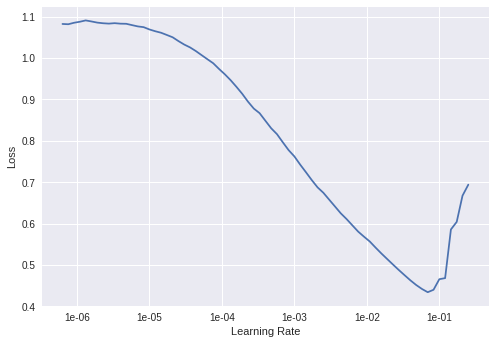

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(10, 5e-3)

epoch,train_loss,valid_loss,accuracy,time
1,0.141977,0.043355,0.995996,00:01
2,0.060391,0.031437,0.990991,00:01
3,0.058165,0.020368,0.990991,00:01
4,0.020622,0.024046,0.997998,00:01
5,0.007359,0.005284,0.998999,00:01
6,0.004557,0.012693,0.998999,00:01
7,0.006534,0.000127,1.000000,00:01
8,0.003649,0.155281,0.998999,00:01
9,0.002297,0.000120,1.000000,00:01
10,0.001248,0.000032,1.000000,00:01


In [0]:
interp = learn.interpret()

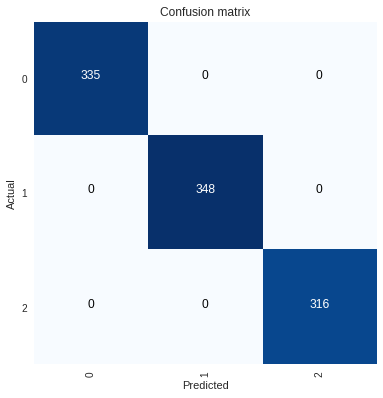

In [0]:
interp.plot_confusion_matrix()

In [0]:
matrix = interp.confusion_matrix()

In [0]:
matrix

array([[335,   0,   0],
       [  0, 348,   0],
       [  0,   0, 316]])

In [0]:
from sklearn.metrics import classification_report, accuracy_score

In [0]:
def get_metrics(matrix):
    preds = []
    targs = []
    
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            for k in range(matrix[i][j]):
                targs.append(i)
                preds.append(j)
    
    print('Accuracy score:', accuracy_score(targs, preds))
    print('Class-wise accuracy:')
    print([matrix[i][i] for i in range(len(matrix))] / np.sum(matrix, axis=1))
    print('Classification report:')
    print(classification_report(targs, preds))

In [0]:
get_metrics(matrix)

Accuracy score: 1.0
Class-wise accuracy:
[1. 1. 1.]
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       335
           1       1.00      1.00      1.00       348
           2       1.00      1.00      1.00       316

   micro avg       1.00      1.00      1.00       999
   macro avg       1.00      1.00      1.00       999
weighted avg       1.00      1.00      1.00       999



## Only 6 features

In [0]:
!cp gdrive/"My Drive"/dataset-rocky-restricted-feat-set.csv ./

In [0]:
df = pd.read_csv('dataset-rocky-restricted-feat-set.csv')

In [0]:
df = rebalance(df)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4995 entries, 0 to 1704
Data columns (total 7 columns):
hab_lbl               4995 non-null int64
P. Min Mass (EU)      4995 non-null float64
P. Mass (EU)          4995 non-null float64
P. Radius (EU)        4995 non-null float64
P. SFlux Min (EU)     4995 non-null float64
P. SFlux Mean (EU)    4995 non-null float64
P. SFlux Max (EU)     4995 non-null float64
dtypes: float64(6), int64(1)
memory usage: 312.2 KB


In [0]:
cat_vars = df.columns[np.where(df.dtypes == 'int64')]
cat_vars = cat_vars.tolist()
cat_vars.remove('hab_lbl')

In [0]:
cat_vars

[]

In [0]:
cont_vars = df.columns[np.where(df.dtypes == 'float64')]
cont_vars = cont_vars.tolist()

In [0]:
data = (TabularList.from_df(df, cat_names=cat_vars, cont_names=cont_vars, procs=procs)
                   .random_split_by_pct(0.3)
                   .label_from_df(cols='hab_lbl')
                   .databunch())

In [0]:
data

TabularDataBunch;

Train: LabelList (3497 items)
x: TabularList
P. Min Mass (EU) 0.7825; P. Mass (EU) 0.0017; P. Radius (EU) 0.7566; P. SFlux Min (EU) 0.1587; P. SFlux Mean (EU) 0.1695; P. SFlux Max (EU) 0.1811; ,P. Min Mass (EU) -0.3647; P. Mass (EU) -0.0961; P. Radius (EU) 0.0058; P. SFlux Min (EU) -0.0127; P. SFlux Mean (EU) -0.0076; P. SFlux Max (EU) -0.0008; ,P. Min Mass (EU) -0.7099; P. Mass (EU) -0.2243; P. Radius (EU) -1.2908; P. SFlux Min (EU) -0.0066; P. SFlux Mean (EU) -0.0066; P. SFlux Max (EU) -0.0067; ,P. Min Mass (EU) -0.0597; P. Mass (EU) 0.0173; P. Radius (EU) 0.5746; P. SFlux Min (EU) 0.0056; P. SFlux Mean (EU) 0.0055; P. SFlux Max (EU) 0.0054; ,P. Min Mass (EU) -0.7946; P. Mass (EU) -0.1074; P. Radius (EU) -0.3126; P. SFlux Min (EU) 0.0884; P. SFlux Mean (EU) 0.1201; P. SFlux Max (EU) 0.1629; 
y: CategoryList
0,0,0,0,0
Path: .;

Valid: LabelList (1498 items)
x: TabularList
P. Min Mass (EU) -0.3491; P. Mass (EU) 0.2186; P. Radius (EU) 1.1888; P. SFlux Min (EU) -0.0320

In [0]:
learn = tabular_learner(data, layers=[100,50], ps=[0.5,0.5], metrics=fastai.basics.accuracy)

In [0]:
learn.model

TabularModel(
  (embeds): ModuleList()
  (emb_drop): Dropout(p=0.0)
  (bn_cont): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=6, out_features=100, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.5)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.5)
    (8): Linear(in_features=50, out_features=3, bias=True)
  )
)

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


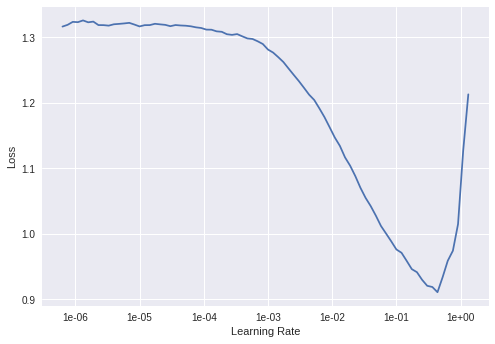

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(10, slice(1e-3))

epoch,train_loss,valid_loss,accuracy,time
1,1.226664,1.046651,0.547397,00:01
2,0.960133,0.871957,0.752336,00:00
3,0.727184,0.552186,0.775701,00:00
4,0.603902,0.527812,0.770360,00:00
5,0.546062,0.511604,0.770360,00:00
6,0.518260,0.509110,0.794393,00:00
7,0.506146,0.511306,0.794393,00:00
8,0.498011,0.538798,0.755674,00:00
9,0.495782,0.521349,0.797730,00:00
10,0.487567,0.502675,0.793725,00:00


In [0]:
interp = learn.interpret()

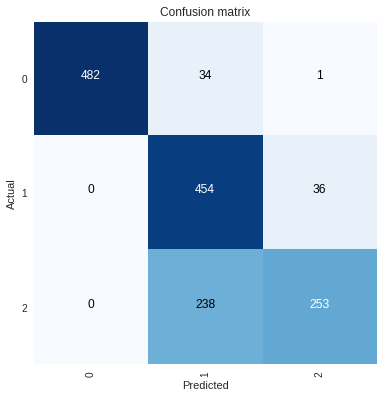

In [0]:
interp.plot_confusion_matrix()

In [0]:
get_metrics(interp.confusion_matrix())

Accuracy score: 0.7937249666221629
Class-wise accuracy:
[0.932302 0.926531 0.515275]
Classification report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96       517
           1       0.63      0.93      0.75       490
           2       0.87      0.52      0.65       491

   micro avg       0.79      0.79      0.79      1498
   macro avg       0.83      0.79      0.79      1498
weighted avg       0.84      0.79      0.79      1498



## Without surface temp

In [0]:
!cp gdrive/"My Drive"/dataset-rocky-no-STemp.csv ./

In [0]:
df = pd.read_csv('dataset-rocky-no-STemp.csv')

In [0]:
df = rebalance(df)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4995 entries, 0 to 1711
Data columns (total 43 columns):
hab_lbl                      4995 non-null int64
P. Zone Class                4995 non-null int64
P. Mass Class                4995 non-null int64
P. Composition Class         4995 non-null int64
P. Atmosphere Class          4995 non-null int64
P. Min Mass (EU)             4995 non-null float64
P. Mass (EU)                 4995 non-null float64
P. Radius (EU)               4995 non-null float64
P. Density (EU)              4995 non-null float64
P. Gravity (EU)              4995 non-null float64
P. Esc Vel (EU)              4995 non-null float64
P. SFlux Min (EU)            4995 non-null float64
P. SFlux Mean (EU)           4995 non-null float64
P. SFlux Max (EU)            4995 non-null float64
P. Teq Min (K)               4995 non-null float64
P. Teq Mean (K)              4995 non-null float64
P. Teq Max (K)               4995 non-null float64
P. Surf Press (EU)           4995 no

In [0]:
df = df.drop('P. Habitable', axis=1)

In [0]:
cat_vars = df.columns[np.where(df.dtypes == 'int64')]
cat_vars = cat_vars.tolist()
cat_vars.remove('hab_lbl')

In [0]:
cat_vars

['P. Zone Class',
 'P. Mass Class',
 'P. Composition Class',
 'P. Atmosphere Class']

In [0]:
cont_vars = df.columns[np.where(df.dtypes == 'float64')]
cont_vars = cont_vars.tolist()

In [0]:
data = (TabularList.from_df(df, cat_names=cat_vars, cont_names=cont_vars, procs=procs)
                   .random_split_by_pct(0.2)
                   .label_from_df(cols='hab_lbl')
                   .databunch())

In [0]:
data

TabularDataBunch;

Train: LabelList (3996 items)
x: TabularList
P. Zone Class 2; P. Mass Class 2; P. Composition Class 3; P. Atmosphere Class 2; P. Min Mass (EU) -0.3025; P. Mass (EU) -0.0976; P. Radius (EU) 0.0230; P. Density (EU) -0.0399; P. Gravity (EU) -0.0480; P. Esc Vel (EU) -0.0854; P. SFlux Min (EU) -0.0112; P. SFlux Mean (EU) -0.0058; P. SFlux Max (EU) 0.0014; P. Teq Min (K) 1.4251; P. Teq Mean (K) 1.5634; P. Teq Max (K) 1.7305; P. Surf Press (EU) -0.0187; P. Mag -1.7536; P. Appar Size (deg) 0.0287; P. Period (days) -0.6071; P. Sem Major Axis (AU) -0.7926; P. Eccentricity 0.8205; P. Mean Distance (AU) -0.7913; P. Inclination (deg) -1.0646; P. Omega (deg) 0.7229; S. Mass (SU) 1.0906; S. Radius (SU) 0.9886; S. Teff (K) 0.9681; S. Luminosity (SU) 0.3831; S. [Fe/H] 0.8152; S. Age (Gyrs) 2.9691; S. Appar Mag -2.7408; S. Mag from Planet -1.7327; S. Size from Planet (deg) 1.3138; S. Hab Zone Min (AU) 0.9417; S. Hab Zone Max (AU) 0.9458; P. HZD -0.9231; P. HZC 0.0052; P. HZA -0.9813; 

In [0]:
learn = tabular_learner(data, layers=[10,5], ps=[0.001,0.01], emb_drop=0.04, metrics=fastai.basics.accuracy)

In [0]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(5, 4)
    (1): Embedding(7, 5)
    (2): Embedding(3, 3)
    (3): Embedding(5, 4)
  )
  (emb_drop): Dropout(p=0.04)
  (bn_cont): BatchNorm1d(37, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=53, out_features=10, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.001)
    (4): Linear(in_features=10, out_features=5, bias=True)
    (5): ReLU(inplace)
    (6): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.01)
    (8): Linear(in_features=5, out_features=3, bias=True)
  )
)

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


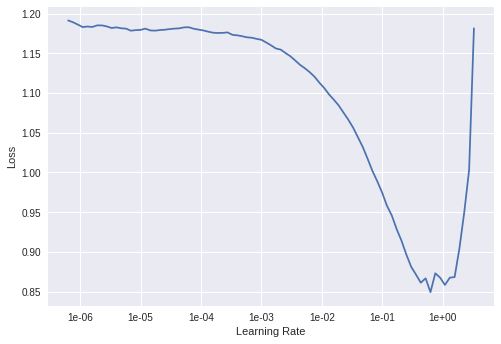

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(10, slice(1e-2))

epoch,train_loss,valid_loss,accuracy,time
1,0.950855,0.773841,0.719720,00:01
2,0.503206,0.157160,0.979980,00:01
3,0.184714,0.089039,0.945946,00:01
4,0.079103,0.007831,1.000000,00:01
5,0.032591,0.012951,0.990991,00:01
6,0.016631,0.011682,1.000000,00:01
7,0.007218,0.001996,1.000000,00:01
8,0.004344,0.001193,1.000000,00:01
9,0.002973,0.001433,1.000000,00:01
10,0.003113,0.000994,1.000000,00:01


In [0]:
interp = learn.interpret()

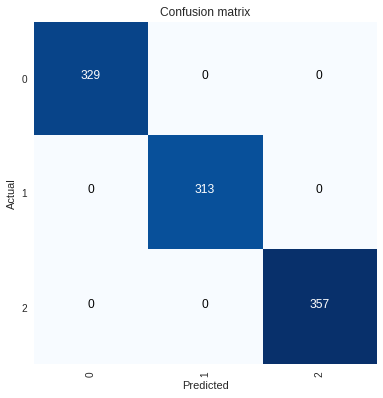

In [0]:
interp.plot_confusion_matrix()

In [0]:
get_metrics(interp.confusion_matrix())

Accuracy score: 1.0
Class-wise accuracy:
[1. 1. 1.]
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       329
           1       1.00      1.00      1.00       313
           2       1.00      1.00      1.00       357

   micro avg       1.00      1.00      1.00       999
   macro avg       1.00      1.00      1.00       999
weighted avg       1.00      1.00      1.00       999

